<a href="https://colab.research.google.com/github/Priyam145/MLprojects/blob/main/notebooks/LinearRegression_maths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

(0.0, 11.950747409309159)

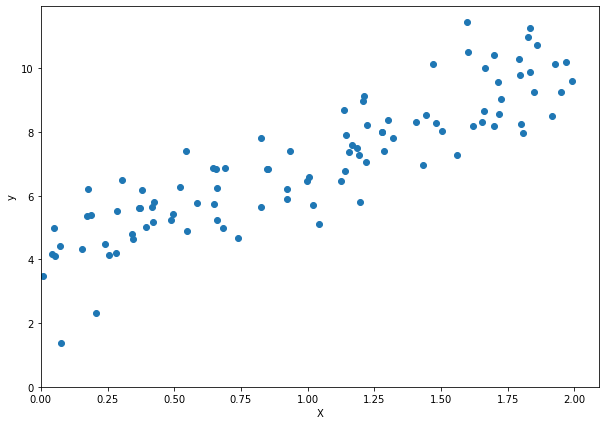

In [4]:
fig, axs = plt.subplots(figsize=(10, 7))
fig.set_facecolor("white")
plt.scatter(X, y);
axs.set_xlabel('X')
axs.set_ylabel('y')
axs.set_xlim(xmin=0)
axs.set_ylim(ymin=0)

In [5]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
X_b[:5]

array([[1.        , 0.54894185],
       [1.        , 1.27901218],
       [1.        , 1.82557401],
       [1.        , 1.66208266],
       [1.        , 0.68310478]])

In [7]:
theta_best

array([[3.97735556],
       [3.05640445]])

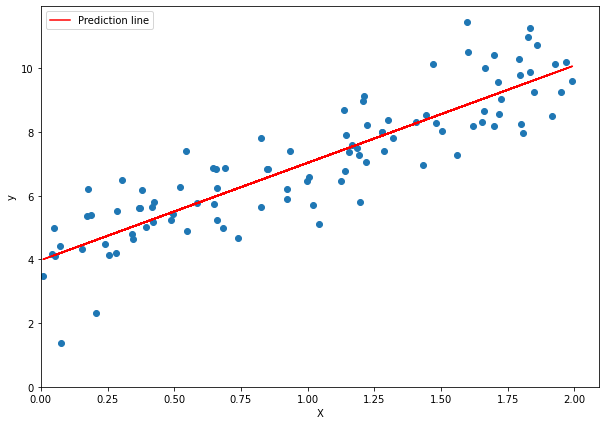

In [8]:
fig, axs = plt.subplots(figsize=(10, 7))
fig.set_facecolor("white")
plt.scatter(X, y);
plt.plot(X, X_b.dot(theta_best), color='red', label='Prediction line')
axs.set_xlabel('X')
axs.set_ylabel('y')
axs.set_xlim(xmin=0)
axs.set_ylim(ymin=0)
plt.legend();

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.97735556],
       [10.09016446]])

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.97735556]), array([[3.05640445]]))

In [12]:
lin_reg.predict(X_new)

array([[ 3.97735556],
       [10.09016446]])

In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.97735556],
       [3.05640445]])

In [14]:
np.linalg.pinv(X_b).dot(y)

array([[3.97735556],
       [3.05640445]])

In [15]:
eta = 0.1
n_iterations = 1000
m = 100

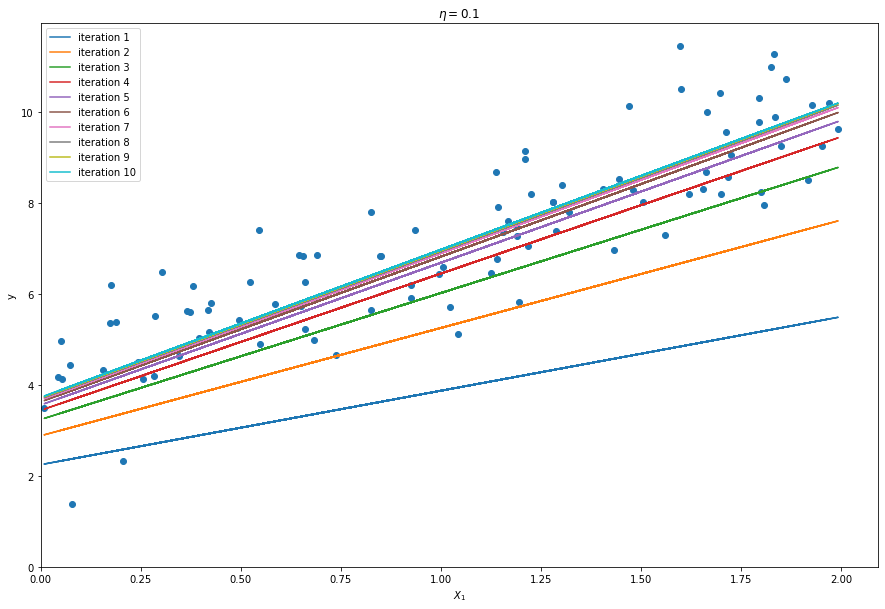

In [16]:
fig, axs = plt.subplots(figsize=(15, 10))
fig.set_facecolor("white")
plt.scatter(X, y);
axs.set_xlabel(r'$X_1$')
axs.set_ylabel('y')
axs.set_xlim(xmin=0)
axs.set_ylim(ymin=0)

theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if iteration < 10:
        plt.plot(X, X_b.dot(theta), label=f'iteration {iteration+1}')

axs.set_title('{eta}'.format(eta=r'$\eta = 0.1$'))
plt.legend();

In [17]:
theta

array([[3.97735556],
       [3.05640445]])

# Stochastic Gradient Descent

In [18]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparamters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [19]:
theta

array([[3.9278836 ],
       [3.01888343]])

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.99062627]), array([3.09704703]))

# Mini-Batch Gradient Descent

# Polynomial Regression

In [22]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

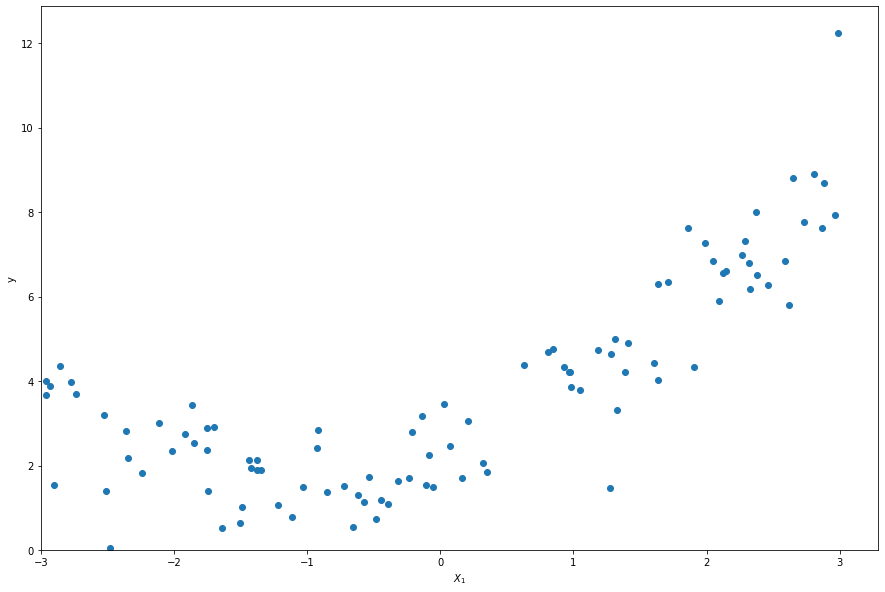

In [23]:
fig, axs = plt.subplots(figsize=(15, 10))
fig.set_facecolor("white")
plt.scatter(X, y);
axs.set_xlabel(r'$X_1$')
axs.set_ylabel('y')
axs.set_xlim(xmin=-3)
axs.set_ylim(ymin=0);

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.75579507])

In [26]:
X_poly[0]

array([-1.75579507,  3.08281632])

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.20787789]), array([[0.9817522, 0.4620787]]))

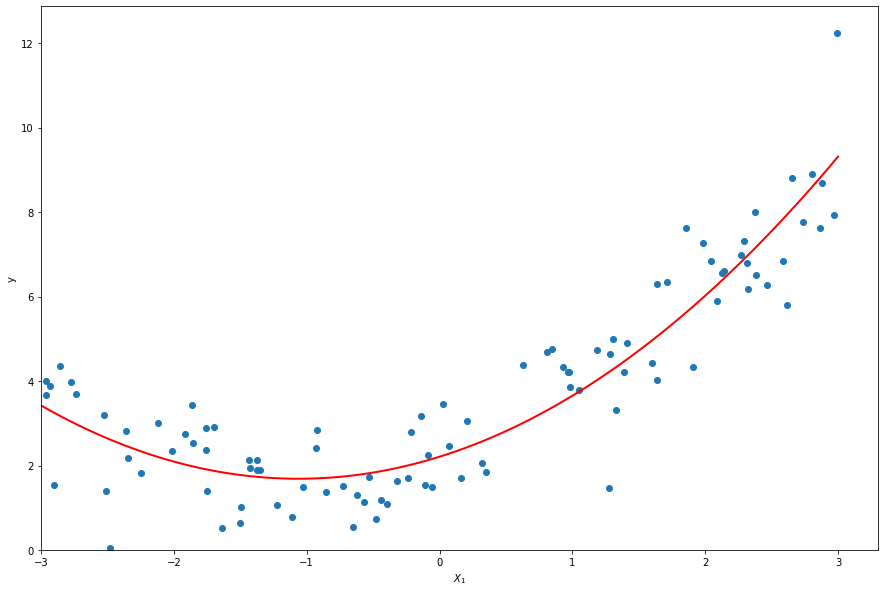

In [28]:
fig, axs = plt.subplots(figsize=(15, 10))
fig.set_facecolor("white")
plt.scatter(X, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
axs.set_xlabel(r'$X_1$')
axs.set_ylabel('y')
axs.set_xlim(xmin=-3)
axs.set_ylim(ymin=0);

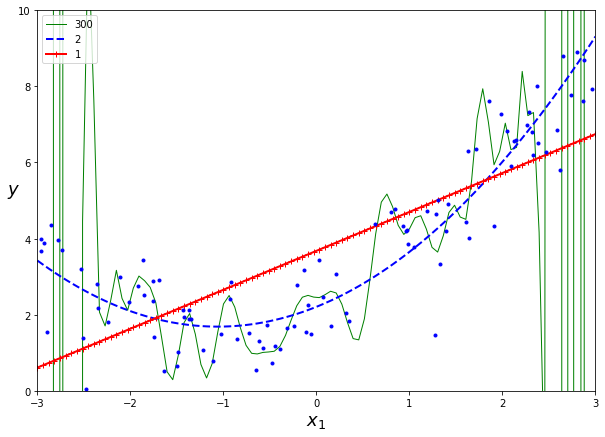

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

fig, axs = plt.subplots(figsize=(10, 7))
fig.set_facecolor('white')

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

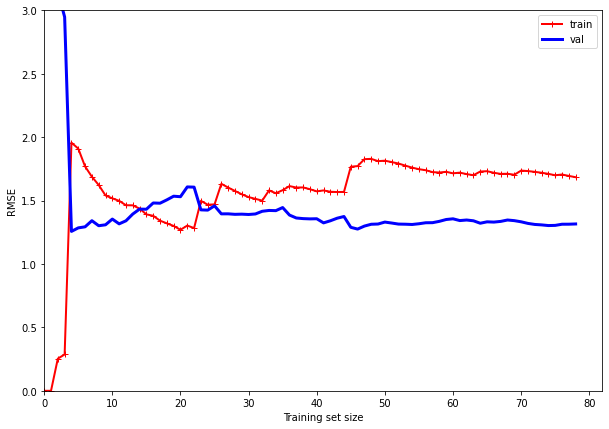

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    fig, axs = plt.subplots(figsize=(10, 7))
    fig.set_facecolor('white')

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    axs.set_xlabel('Training set size')
    axs.set_ylabel('RMSE')
    axs.set_xlim(xmin=0)
    axs.set_ylim(ymin=0, ymax=3.0)
    plt.legend()

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
polynomial_regression = Pipeline([
            ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
            ("lin_reg", LinearRegression())
])

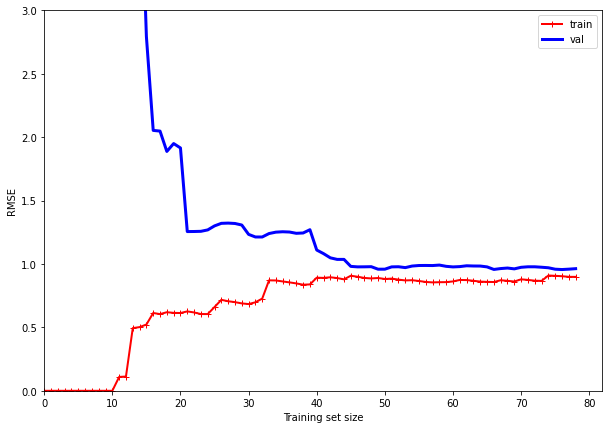

In [33]:
plot_learning_curves(polynomial_regression, X, y)

# Ridge Regression

In [34]:
from sklearn.linear_model import Ridge

In [35]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.2083327]])

In [36]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.1818802])


# Lasso Regression

In [37]:
from sklearn.linear_model import Lasso

In [38]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.16716405])

In [39]:
lasso_reg = SGDRegressor(penalty='l1')
lasso_reg.fit(X, y.ravel())
lasso_reg.predict([[1.5]])

array([5.19984539])

In [40]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
print(t1.shape)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

(500, 500)


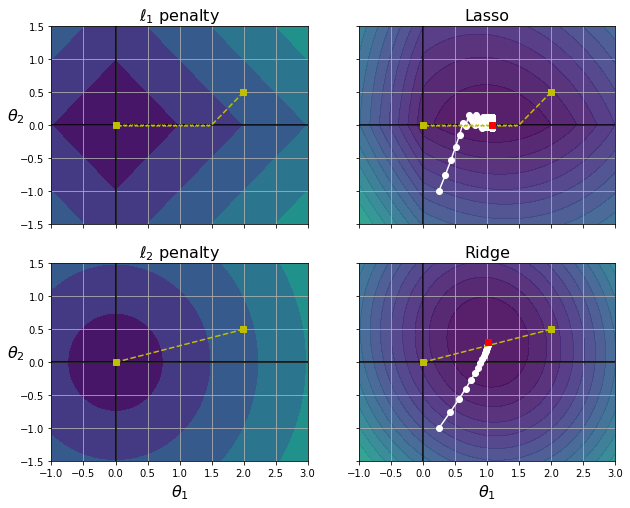

In [41]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
fig.set_facecolor('white')
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

plt.show()

# Elastic Net

In [42]:
from sklearn.linear_model import ElasticNet

In [43]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.16735704])

# Early Stopping

In [44]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

## Early Stopping - Example Code:

In [45]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

## Early Stopping - Graph:

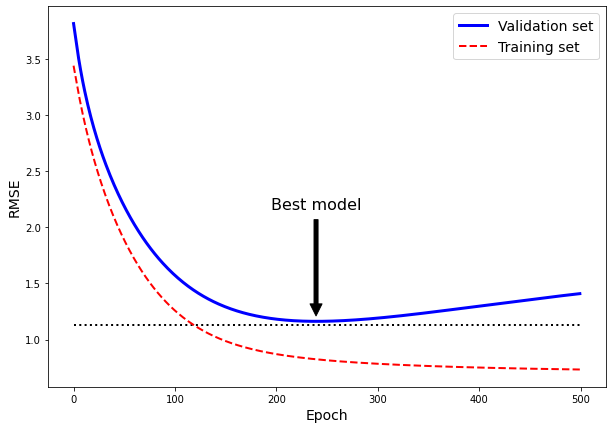

In [46]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

fig, axs = plt.subplots(figsize=(10, 7))
fig.set_facecolor('white')

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

# Logistic Regression

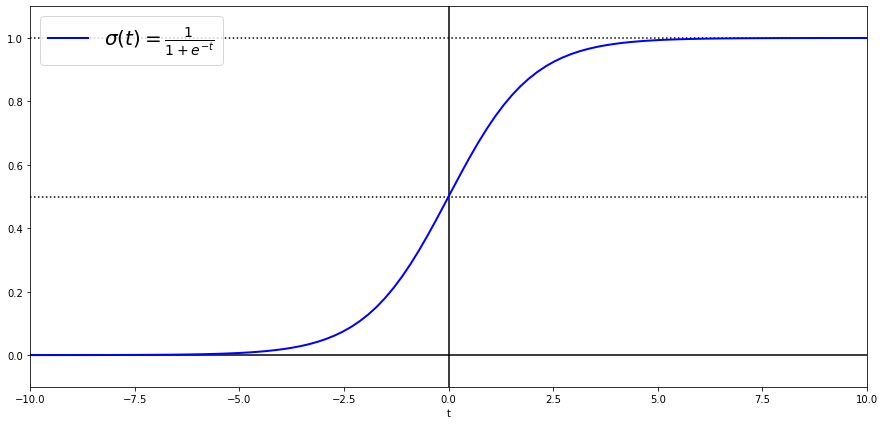

In [47]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

fig, axs = plt.subplots(figsize=(15, 7))
fig.set_facecolor('white')
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [48]:
from sklearn import datasets

In [49]:
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [50]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

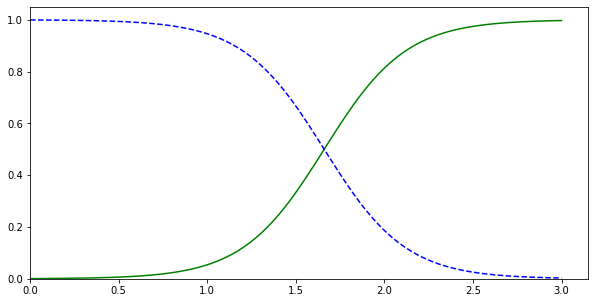

In [53]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
fig, axs = plt.subplots(figsize=(10, 5))
fig.set_facecolor('white')
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
axs.set_xlim(xmin=0)
axs.set_ylim(ymin=0);

/usr/local/lib/python3.6/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


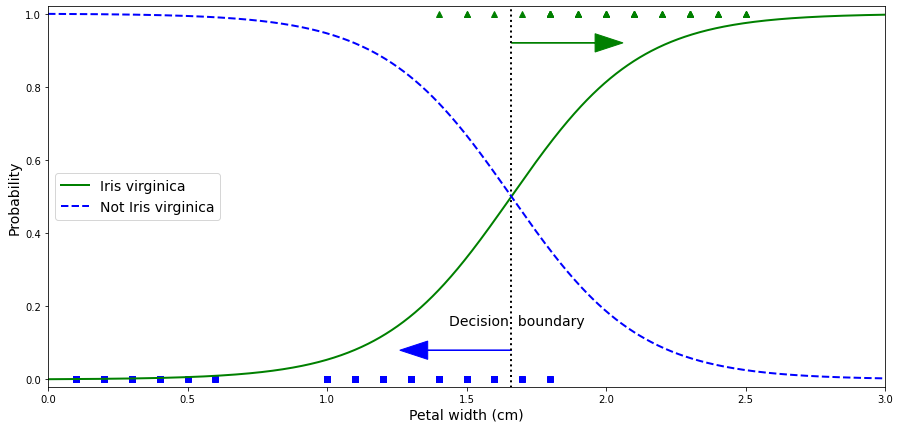

In [54]:
fig, axs = plt.subplots(figsize=(15, 7))
fig.set_facecolor('white')

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [55]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

# Softmax Regression

In [56]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
softmax_reg.predict([[5, 2]])

array([2])

In [58]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Softmax Regression (Without scikit-learn):

In [59]:
import pandas as pd

In [60]:
iris_data = iris["data"]
iris_target = iris["target"]

In [61]:
iris_data[:5] 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [62]:
iris_target[:5]

array([0, 0, 0, 0, 0])

In [63]:
np.unique(iris_target)

array([0, 1, 2])

In [64]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Adding bias to the data:

Every data will have a certain amount of bias i.e $x^{i}_0$ = 1, where $x^{i}_0$ = $0^{th}$ feature of $i^{th}$ instance of x

In [81]:
iris_data_with_bias = np.c_[np.ones((iris_data.shape[0], 1)), iris_data]
iris_data_with_bias[:5]

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [1. , 4.9, 3. , 1.4, 0.2],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 4.6, 3.1, 1.5, 0.2],
       [1. , 5. , 3.6, 1.4, 0.2]])

### Splitting the dataset into train and test without using Scikit-learn (train_test_split)

In [86]:
np.random.seed(2000)

We will follow the general practice of splitting the dataset into 80% train and 20% test.

In [120]:
def train_test_split(X, y, test_ratio=0.2):
    total_size = len(X)
    random_indices = np.random.permutation(total_size)

    train_size = int(total_size*(1 - test_ratio))

    train = X[random_indices[:train_size]]
    train_result = y[random_indices[:train_size]]
    test = X[random_indices[train_size:]]
    test_result = y[random_indices[train_size:]]

    return train, train_result, test, test_result

In [121]:
iris_train, iris_train_result, iris_test, iris_test_result = train_test_split(iris_data_with_bias, 
                                                                              iris_target, 
                                                                              test_ratio=0.2)

In [122]:
print('training:', iris_train.shape,'training_result:', iris_train_result.shape )
print('train set:\n',iris_train[:5])
print('train result set:\n', iris_train_result[:5])

training: (120, 5) training_result: (120,)
train set:
 [[1.  5.  3.  1.6 0.2]
 [1.  4.9 2.5 4.5 1.7]
 [1.  5.8 2.7 5.1 1.9]
 [1.  5.7 2.5 5.  2. ]
 [1.  5.6 2.8 4.9 2. ]]
train result set:
 [0 2 2 2 2]


In [123]:
print('test:', iris_test.shape,'test_result:', iris_test_result.shape )
print('test set:\n',iris_test[:5])
print('test result set:\n', iris_test_result[:5])

test: (30, 5) test_result: (30,)
test set:
 [[1.  7.1 3.  5.9 2.1]
 [1.  5.4 3.9 1.3 0.4]
 [1.  5.1 3.8 1.5 0.3]
 [1.  4.8 3.4 1.6 0.2]
 [1.  6.7 3.1 4.4 1.4]]
test result set:
 [2 0 0 0 1]


### One-hot Encoding the train target set:

In [124]:
def one_hot_encoder(target):
    encoded_target = np.zeros(shape=(target.size, np.unique(target).size))
    encoded_target[np.arange(target.size), target] = 1
    return encoded_target

In [125]:
encoded_target = one_hot_encoder(iris_train_result)
np.unique(encoded_target, axis=0)

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

### Fucntions for the Softmax scores and probabilities of training set:

In [134]:
def softmax_scores_func(data, theta):
    return data.dot(theta)

In [135]:
def softmax_probability_func(softmax_scores):
    return np.exp(softmax_scores)/np.sum(np.exp(softmax_scores), axis=1, keepdims=True)

### Finding Optimum $\vec{\theta}^{\,}_k$, where k $\epsilon$ (0, K), for K = no.of classes:

In [168]:
def optimum_theta(X, y, n_iterations, alpha, validation_ratio, n_validations):
    best_accuracy = 0
    best_theta = np.zeros(shape=(X.shape[1], np.unique(y).size))
    best_validation = -1
    
    for validation in range(n_validations):
        
        X_train, y_train, X_valid, y_valid = train_test_split(X, y)
        softmax_theta = np.random.randn(X_train.shape[1], np.unique(y_train).size)
        m = y_train.size
        y_one_hot = one_hot_encoder(y_train)
        y_valid_one_hot = one_hot_encoder(y_valid)
        print('Validation : ', validation)

        for iteration in range(n_iterations):
            softmax_scores = softmax_scores_func(X_train, softmax_theta)
            softmax_proba = softmax_probability_func(softmax_scores)
            loss = np.mean(np.sum(y_one_hot * np.log(softmax_proba), axis=1))
            if iteration % 500 == 0: 
                print(iteration,' ', f'{loss:.5f}')
            softmax_theta = softmax_theta - (alpha/m)*(X_train.T.dot(softmax_proba - y_one_hot))

        y_predict = np.argmax(X_valid.dot(softmax_theta), axis=1)
        accuracy = np.sum(y_predict == y_valid)/len(y_valid)
        print(f'ACCURACY: {accuracy:.5f}')

        if(accuracy > best_accuracy):
            best_accuracy = accuracy
            best_theta = softmax_theta
            best_validation = validation

    return best_theta, best_accuracy, best_validation

In [169]:
softamx_theta, validation_accuracy, validation = optimum_theta(iris_train, iris_train_result, n_iterations=5001, alpha=0.01, validation_ratio=0.4, n_validations=5)

Validation :  0
0   -9.82258
500   -0.40400
1000   -0.33517
1500   -0.29030
2000   -0.25809
2500   -0.23382
3000   -0.21490
3500   -0.19975
4000   -0.18735
4500   -0.17702
5000   -0.16829
ACCURACY: 0.95833
Validation :  1
0   -10.25138
500   -0.45155
1000   -0.36310
1500   -0.31125
2000   -0.27508
2500   -0.24813
3000   -0.22721
3500   -0.21048
4000   -0.19677
4500   -0.18533
5000   -0.17562
ACCURACY: 0.95833
Validation :  2
0   -5.93498
500   -0.47141
1000   -0.36158
1500   -0.30998
2000   -0.27446
2500   -0.24758
3000   -0.22636
3500   -0.20918
4000   -0.19499
4500   -0.18307
5000   -0.17292
ACCURACY: 0.95833
Validation :  3
0   -5.89015
500   -0.40303
1000   -0.33238
1500   -0.28885
2000   -0.25782
2500   -0.23446
3000   -0.21621
3500   -0.20156
4000   -0.18953
4500   -0.17947
5000   -0.17092
ACCURACY: 0.95833
Validation :  4
0   -5.53726
500   -0.40026
1000   -0.33881
1500   -0.30014
2000   -0.27189
2500   -0.25009
3000   -0.23270
3500   -0.21850
4000   -0.20669
4500   -0.19670
500

In [172]:
print(softmax_theta)
print(validation_accuracy)
print(validation)

[[ 1.84589647  0.57818659 -0.24758293]
 [ 1.1158566   0.4649692  -1.02667905]
 [ 1.97035261  1.14938711 -0.4776038 ]
 [-2.15255403  0.2360586   2.63649426]
 [-0.82983157 -0.28889038  1.57819156]]
1.0
4


In [179]:
def predict(X, theta):
    predictions = X.dot(theta)
    return np.argmax(predictions, axis=1)

In [180]:
final_predictions = predict(iris_test, softmax_theta)

In [181]:
final_accuracy = np.sum(final_predictions == iris_test_result)/len(iris_test_result)
final_accuracy

1.0

In [183]:
print('Final_predictions:\n', final_predictions[:5])
print('\nTest results:\n', iris_test_result[:5])

Final_predictions:
 [2 0 0 0 1]

Test results:
 [2 0 0 0 1]
